In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración de estilo de gráficos --- 
sns.set(context="notebook", style="whitegrid")

df = pd.read_csv("./train.csv")

# Desde Google Colab, montar desde Google Drive
# from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

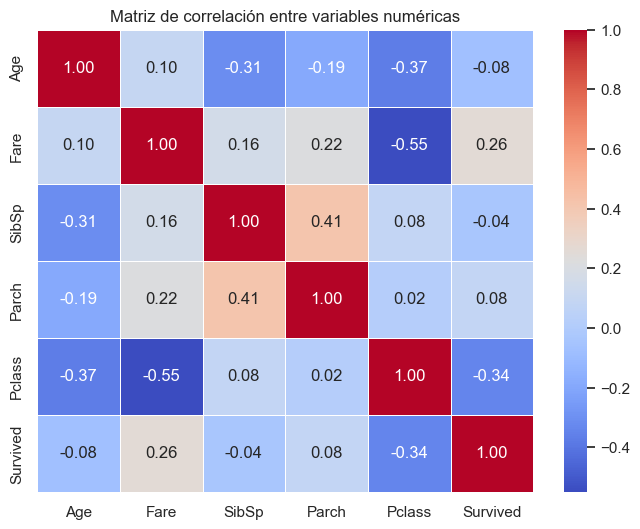

In [16]:
# --- Correlación entre variables numéricas --- 
num_vars = ['Age','Fare','SibSp','Parch','Pclass','Survived']

corr = df[num_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


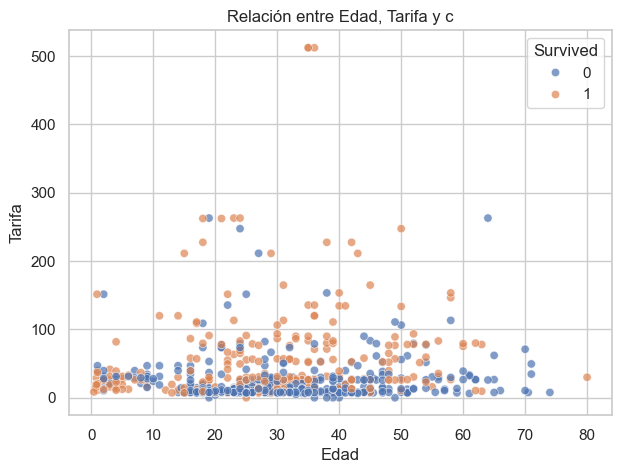

In [17]:
# --- Diagrama de dispersión: Edad vs Tarifa ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived", alpha=0.7)
plt.title("Relación entre Edad, Tarifa y c")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()


In [18]:
# --- Tabla cruzada: Sexo vs Supervivencia ---
sex_surv = pd.crosstab(df['Sex'], df['Survived'], margins=True)
print("Tabla cruzada absoluta:\n", sex_surv)

# Normalizada por fila (porcentaje de cada categoría)
sex_surv_pct = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print("\nTabla cruzada en porcentajes (%):\n", sex_surv_pct.round(2))

Tabla cruzada absoluta:
 Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Tabla cruzada en porcentajes (%):
 Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


In [19]:
# --- Tabla cruzada: Clase vs Supervivencia ---
pclass_surv = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
print("Tabla cruzada absoluta:\n", pclass_surv)

# Normalizada por fila (porcentaje dentro de cada clase)
pclass_surv_pct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print("\nTabla cruzada en porcentajes (%):\n", pclass_surv_pct.round(2))


Tabla cruzada absoluta:
 Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Tabla cruzada en porcentajes (%):
 Survived      0      1
Pclass                
1         37.04  62.96
2         52.72  47.28
3         75.76  24.24


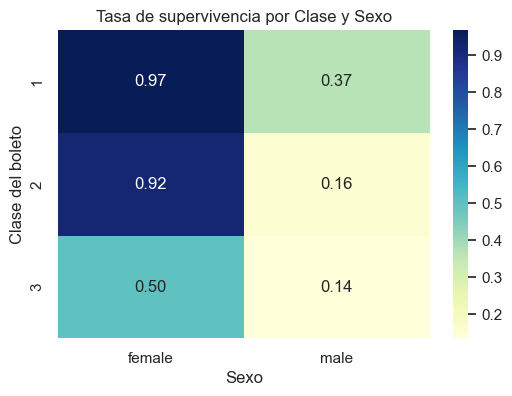

In [20]:
# --- Tasa de supervivencia por Clase y Sexo ---
survival_rates = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')

plt.figure(figsize=(6,4))
sns.heatmap(survival_rates, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Tasa de supervivencia por Clase y Sexo")
plt.ylabel("Clase del boleto")
plt.xlabel("Sexo")
plt.show()
